**Baseline**

In [1]:
!git clone https://github.com/coick4698/garbage_classification.git

Cloning into 'garbage_classification'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (137/137), done.
remote: Total 167 (delta 77), reused 42 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (167/167), 3.26 MiB | 17.74 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/garbage_classification

import sys
sys.path.append('/content/garbage_classification/src')

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from dataset import get_dataloaders
from model import get_mobilenetv2, get_densenet121, get_squeezenet, get_shufflenetv2
from train import train_model
from utils import plot_accuracy, plot_confusion_matrix, eval_precision_recall_f1

data_path = '/content/drive/MyDrive/iss_project/garbage_classification'

Mounted at /content/drive
/content/garbage_classification


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


100%|██████████| 30.8M/30.8M [00:00<00:00, 181MB/s]


Epoch [1/10] Train Acc: 74.80%, Val Acc: 78.47%
Epoch [2/10] Train Acc: 84.09%, Val Acc: 86.91%
Epoch [3/10] Train Acc: 87.63%, Val Acc: 82.02%
Epoch [4/10] Train Acc: 90.52%, Val Acc: 81.32%
Epoch [5/10] Train Acc: 90.84%, Val Acc: 85.81%
Epoch [6/10] Train Acc: 92.57%, Val Acc: 88.01%
Epoch [7/10] Train Acc: 93.39%, Val Acc: 87.71%
Epoch [8/10] Train Acc: 93.72%, Val Acc: 90.51%
Epoch [9/10] Train Acc: 94.61%, Val Acc: 90.46%
Epoch [10/10] Train Acc: 96.00%, Val Acc: 90.11%


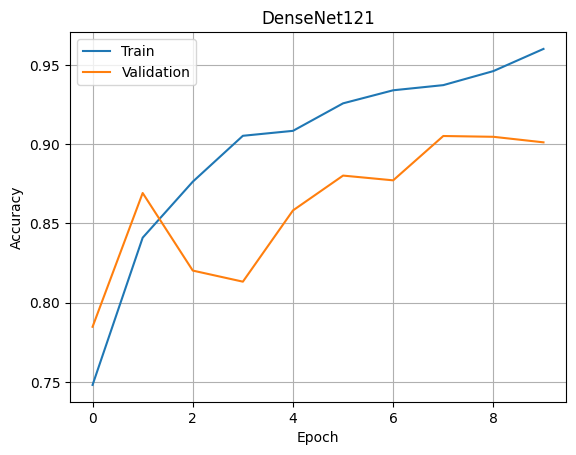

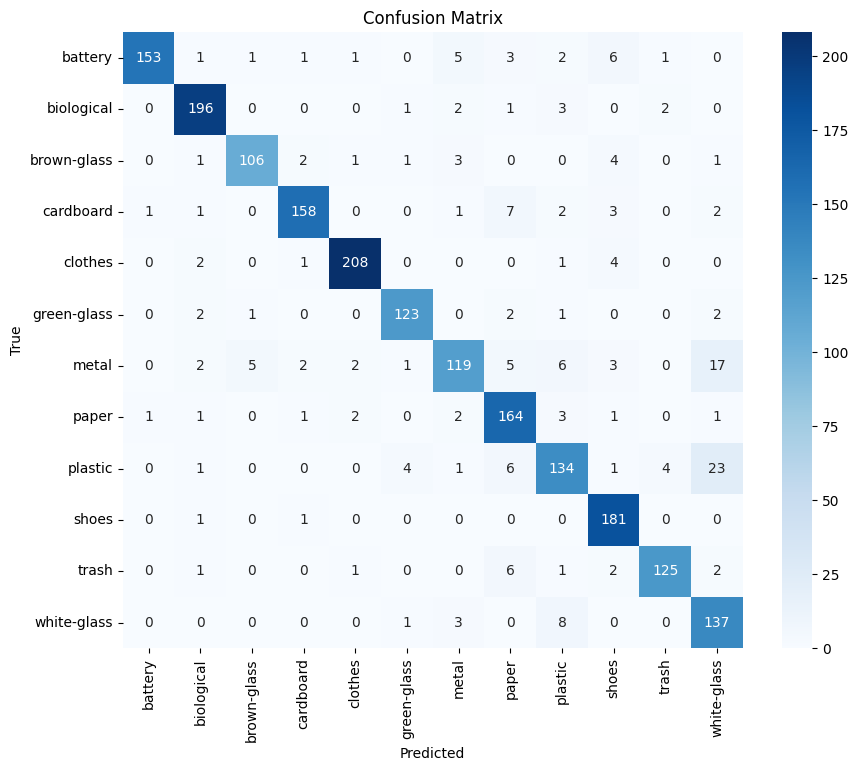

Classification Report:
              precision    recall  f1-score   support

     battery     0.9871    0.8793    0.9301       174
  biological     0.9378    0.9561    0.9469       205
 brown-glass     0.9381    0.8908    0.9138       119
   cardboard     0.9518    0.9029    0.9267       175
     clothes     0.9674    0.9630    0.9652       216
 green-glass     0.9389    0.9389    0.9389       131
       metal     0.8750    0.7346    0.7987       162
       paper     0.8454    0.9318    0.8865       176
     plastic     0.8323    0.7701    0.8000       174
       shoes     0.8829    0.9891    0.9330       183
       trash     0.9470    0.9058    0.9259       138
 white-glass     0.7405    0.9195    0.8204       149

    accuracy                         0.9011      2002
   macro avg     0.9037    0.8985    0.8988      2002
weighted avg     0.9052    0.9011    0.9009      2002

Accuracy: 0.9011


RuntimeError: Parent directory results/checkpoints does not exist.

In [3]:
# DenseNet121 - Full dataset (11m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_densenet121(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="DenseNet121")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/densenet121_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 75.33%, Val Acc: 76.57%
Epoch [2/10] Train Acc: 84.59%, Val Acc: 81.22%
Epoch [3/10] Train Acc: 87.21%, Val Acc: 81.77%
Epoch [4/10] Train Acc: 89.49%, Val Acc: 82.92%
Epoch [5/10] Train Acc: 90.54%, Val Acc: 87.56%
Epoch [6/10] Train Acc: 91.91%, Val Acc: 89.16%
Epoch [7/10] Train Acc: 92.20%, Val Acc: 87.46%
Epoch [8/10] Train Acc: 93.02%, Val Acc: 89.56%
Epoch [9/10] Train Acc: 94.21%, Val Acc: 87.01%
Epoch [10/10] Train Acc: 93.39%, Val Acc: 87.91%


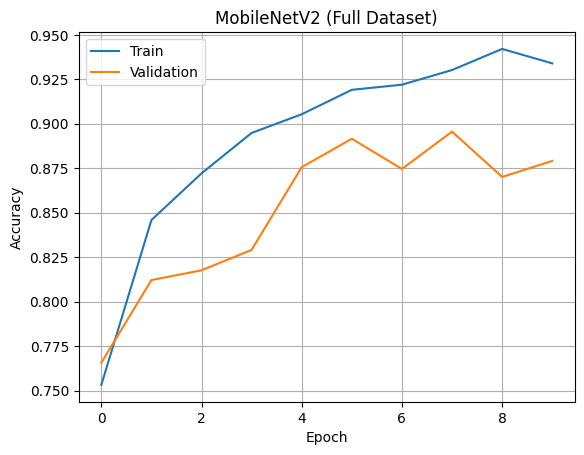

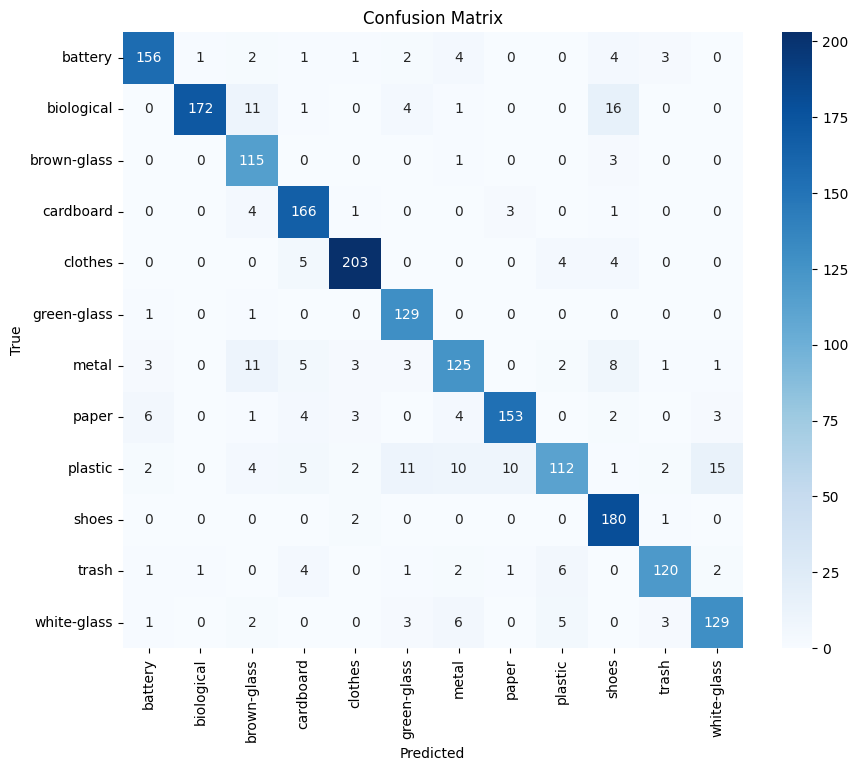

In [ ]:
# MobilenetV2 - Full dataset (17m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_mobilenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="MobileNetV2")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/mobilenetv2_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 27.22%, Val Acc: 41.41%
Epoch [2/10] Train Acc: 47.80%, Val Acc: 55.64%
Epoch [3/10] Train Acc: 57.76%, Val Acc: 53.25%
Epoch [4/10] Train Acc: 62.58%, Val Acc: 67.63%
Epoch [5/10] Train Acc: 66.95%, Val Acc: 65.48%
Epoch [6/10] Train Acc: 71.02%, Val Acc: 72.33%
Epoch [7/10] Train Acc: 73.07%, Val Acc: 73.73%
Epoch [8/10] Train Acc: 73.93%, Val Acc: 71.18%
Epoch [9/10] Train Acc: 76.33%, Val Acc: 73.98%
Epoch [10/10] Train Acc: 78.12%, Val Acc: 76.17%


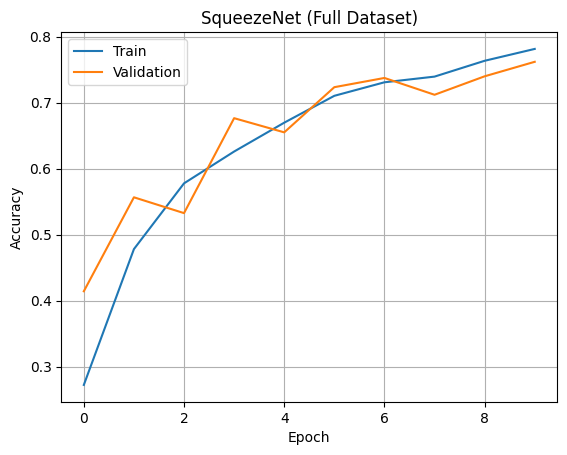

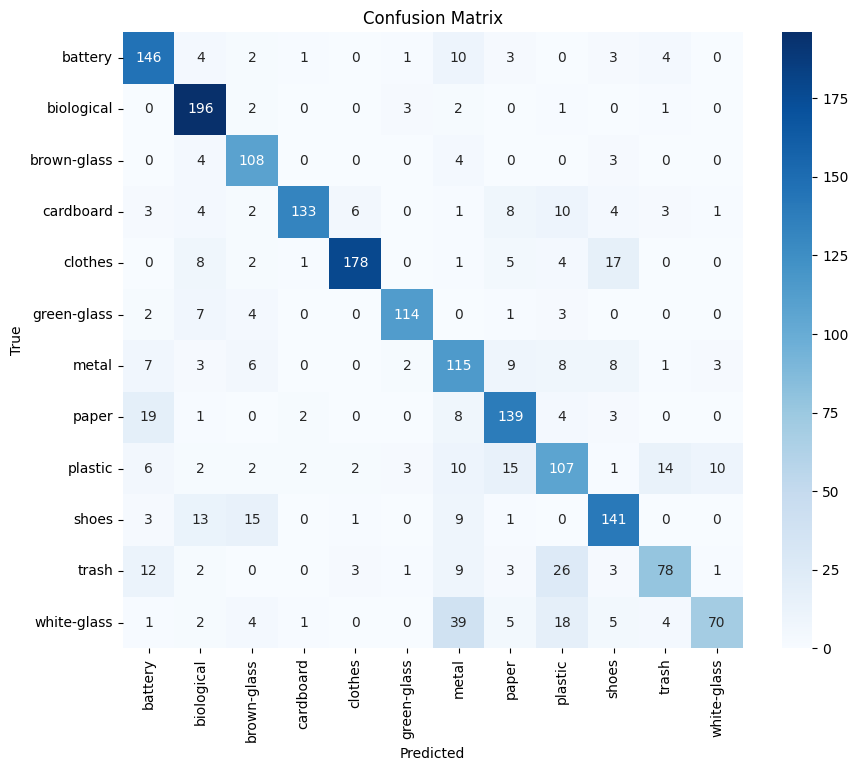

In [ ]:
# Squeezenet - Full dataset(8m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_squeezenet(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="SqueezeNet")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/squeezenet_full_epoch10.pth")

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10] Train Acc: 74.44%, Val Acc: 88.61%
Epoch [2/10] Train Acc: 89.19%, Val Acc: 90.76%
Epoch [3/10] Train Acc: 92.31%, Val Acc: 90.46%
Epoch [4/10] Train Acc: 95.07%, Val Acc: 93.41%
Epoch [5/10] Train Acc: 95.72%, Val Acc: 92.56%
Epoch [6/10] Train Acc: 96.84%, Val Acc: 91.46%
Epoch [7/10] Train Acc: 96.12%, Val Acc: 93.36%
Epoch [8/10] Train Acc: 96.92%, Val Acc: 91.81%
Epoch [9/10] Train Acc: 97.28%, Val Acc: 92.81%
Epoch [10/10] Train Acc: 97.88%, Val Acc: 91.81%


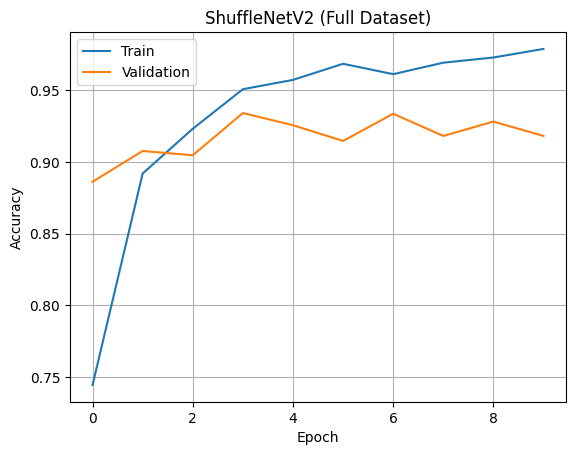

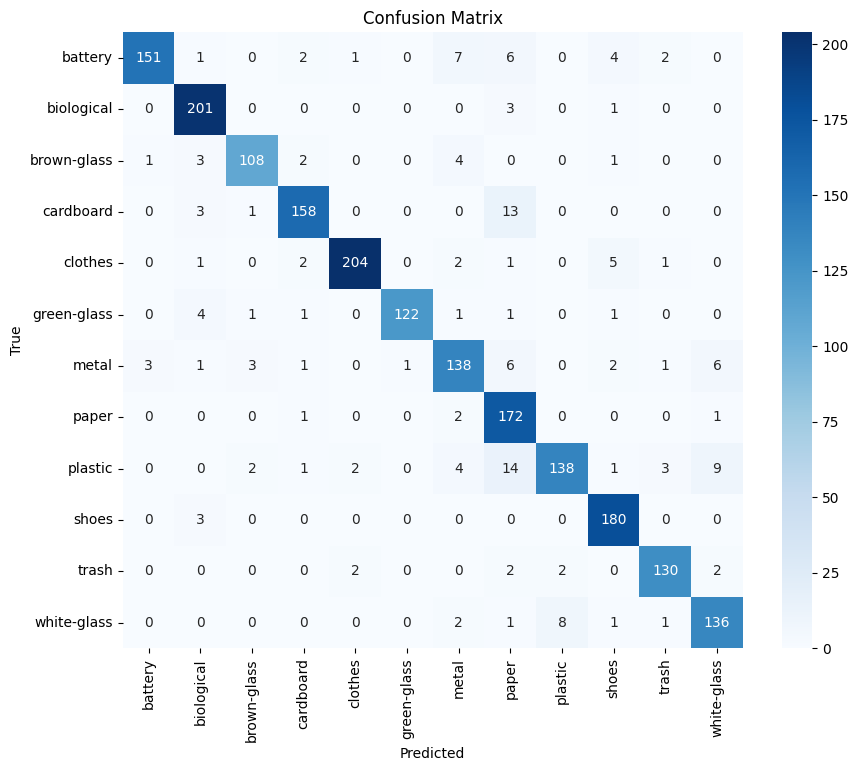

In [ ]:
# ShufflenetV2 - Full dataset (8m)
train_loader, val_loader, class_names = get_dataloaders(data_path, use_small=False)

model = get_shufflenetv2(num_classes=12).to(device)
train_acc, val_acc = train_model(model, train_loader, val_loader, num_epochs=10, device=device)

plot_accuracy(train_acc, val_acc, title="ShuffleNetV2")
plot_confusion_matrix(model, val_loader, class_names, device=device)
acc, report, y_true, y_pred = eval_precision_recall_f1(model, val_loader, class_names, device)

torch.save(model.state_dict(), "results/checkpoints/shufflenetv2_full_epoch10.pth")